In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

<Axes: >

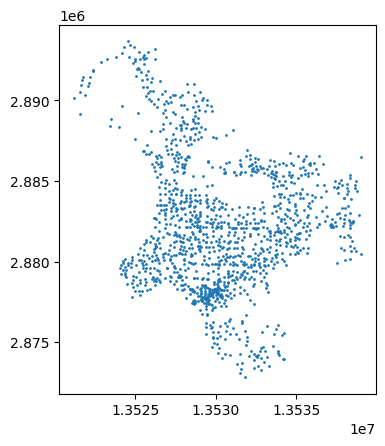

In [2]:
# read Youbike station csv
Youbike_data_df = pd.read_csv('./Youbike2.0.csv', encoding = "Big5") 
# covert csv file to geopandas format (geometry)
Youbike_data_gdf = gpd.GeoDataFrame(
    Youbike_data_df, geometry=gpd.points_from_xy(Youbike_data_df.lng, Youbike_data_df.lat)
)
Youbike_data_gdf.head()
# set CRS and transform crs
Youbike_data_gdf.crs = "EPSG:4326" 
Youbike_data_gdf = Youbike_data_gdf.to_crs(epsg = 3857)
Youbike_data_gdf.plot(markersize = 1)

<Axes: >

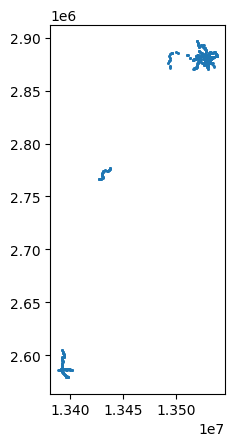

In [3]:
# read MRT shp
MRT_data = gpd.read_file('./MRT/MARK_捷運車站_1111103.shp', encoding='utf-8')
MRT_data.head()
MRT_data = MRT_data.to_crs(epsg=3857)
MRT_data.head()

MRT_data.plot(markersize = 1)

   FID  OBJECTID     LENGTH RouteName  \
0    0         1  10078.770       淡水線   
1    1         2   2095.643       蘆洲線   
2    2         6      9.394       板橋線   
3    3         7   4283.014       中和線   
4    4        10      0.000       新店線   

                                            geometry  
0  MULTILINESTRING ((294734.775 2784579.758, 2950...  
1  LINESTRING (297459.447 2776589.342, 297262.957...  
2  MULTILINESTRING ((293986.040 2762126.890, 2940...  
3  LINESTRING (302748.838 2768839.462, 302839.421...  
4  LINESTRING (304338.706 2761408.833, 304377.770...  


<Axes: >

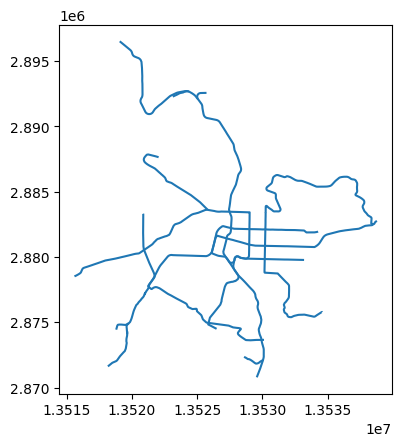

In [4]:
# Read MRT route
MRTRoutes_gdf =gpd.read_file("TpeMRTRoutes_TWD97.json")
print(MRTRoutes_gdf.head())
MRTRoutes_gdf = MRTRoutes_gdf.to_crs(epsg=3857)
MRTRoutes_gdf.plot()

   TOWNID  TOWNCODE COUNTYNAME TOWNNAME              TOWNENG COUNTYID  \
0     A02  63000030        臺北市      大安區       Da'an District        A   
1     A11  63000080        臺北市      文山區     Wenshan District        A   
31    C07  63000020        臺北市      信義區       Xinyi District        C   
32    A05  63000070        臺北市      萬華區      Wanhua District        A   
33    C01  63000050        臺北市      中正區  Zhongzheng District        C   

   COUNTYCODE                                           geometry  
0       63000  POLYGON ((121.54385 25.04490, 121.54408 25.044...  
1       63000  POLYGON ((121.59726 25.01438, 121.59725 25.014...  
31      63000  POLYGON ((121.57996 25.04950, 121.57996 25.049...  
32      63000  POLYGON ((121.50521 25.04949, 121.50555 25.049...  
33      63000  POLYGON ((121.51342 25.04940, 121.51376 25.049...  


<Axes: >

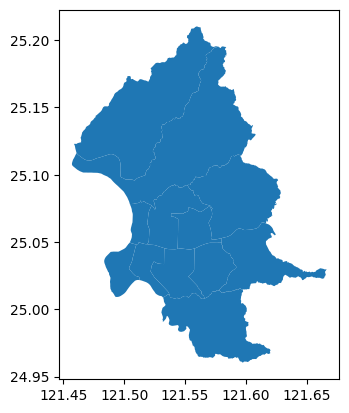

In [5]:
# read Taipei shp
Big_Taipei_data = gpd.read_file('./Town/Taipei.shp', encoding='utf-8')
Taipei_data = Big_Taipei_data[(Big_Taipei_data['COUNTYNAME']=='臺北市')]
print(Taipei_data.head())
Taipei_data.plot()

Clip

In [6]:
## 確保相同CRS(Coordinate Reference System)
Taipei_data = Taipei_data.to_crs(epsg=3857)
print(Taipei_data.crs)
print(MRT_data.crs)

EPSG:3857
EPSG:3857


          MARKID MARKTYPE1  MARKTYPE2      MARKNAME1    MARKNAME2   MDATE  \
428  A0000000558   9960103        NaN   臺北捷運景美站-出入口2   北捷景美站-出入口2  202202   
437  A0000000464   9960103        NaN  臺北捷運萬芳醫院站-出入口  北捷萬芳醫院站-出入口  201504   
422  A0000000458   9960103        NaN        貓空纜車貓空站        貓纜貓空站  202205   
423  A0000007094   9960103        NaN       貓空纜車指南宮站       貓纜指南宮站  202205   
424  A0000007092   9960103        NaN      貓空纜車動物園南站      貓纜動物園南站  202205   

                         ADDRESS            TEL  \
428  臺北市文山區景中街1號與景美街交叉口、文山二分局斜對面            NaN   
437              臺北市文山區興隆路三段113號            NaN   
422       臺北市文山區指南里7鄰指南路三段38巷35號  (02)8661-8110   
423          臺北市文山區指南路三段157巷200號  (02)8661-8110   
424          臺北市文山區萬興里新光路二段30之2號  (02)8661-8110   

                             geometry  
428  POINT (13529947.131 2874893.837)  
437  POINT (13531752.040 2875661.815)  
422  POINT (13535132.402 2871946.036)  
423  POINT (13535299.221 2873157.454)  
424  POINT (13535042.680 28745

<Axes: >

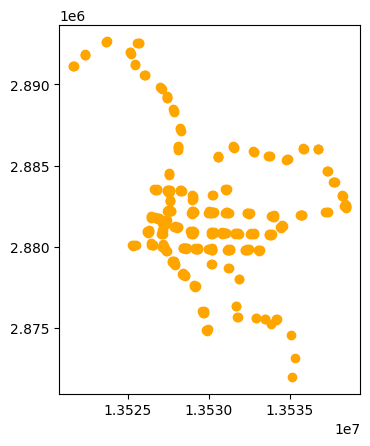

In [7]:
# clip
clip_station = gpd.clip(MRT_data, Taipei_data)
print(clip_station.head())
clip_station.plot(color = 'orange')

(13514182.334975824, 13545200.695703445, 2869241.3604091248, 2903121.776248967)

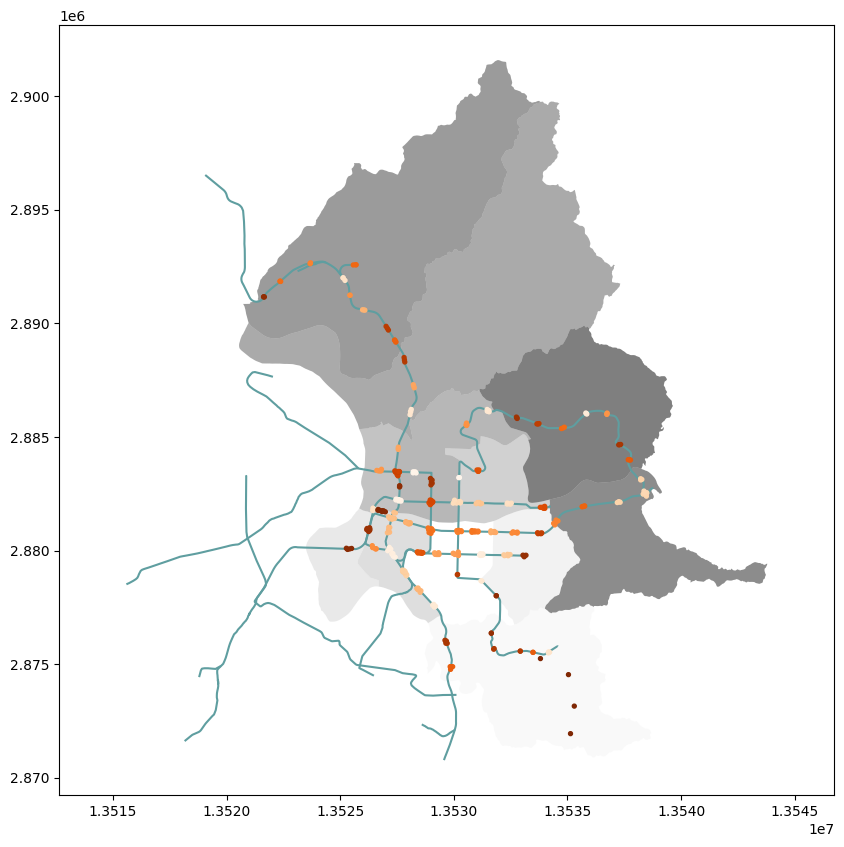

In [8]:
fig, ax = plt.subplots(figsize=(10, 10))

Taipei_data.plot(cmap='Greys',
                       ax=ax,
                       alpha=.5)

clip_station.plot(cmap = 'Oranges', ax=ax,
                 column='MARKNAME2', markersize = 8, zorder = 2)
MRTRoutes_gdf.plot(color = 'cadetblue', ax = ax, zorder = 1)
plt.axis('equal')

Dissolve

,geometry,TOWNID,TOWNCODE,TOWNNAME,TOWNENG,COUNTYID,COUNTYCODE
COUNTYNAME,,,,,,,
新北市,"POLYGON ((121.45038 24.79093, 121.45027 24.791...",F33,65000040,永和區,Yonghe District,F,65000
臺北市,"POLYGON ((121.53184 25.00869, 121.53173 25.008...",A02,63000030,大安區,Da'an District,A,63000


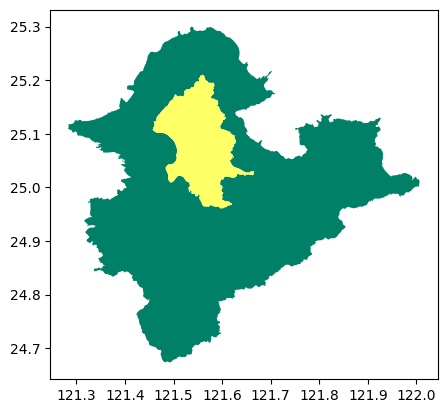

In [9]:
## dissolve
Big_Taipei_data_dissolve = Big_Taipei_data.dissolve(by = 'COUNTYNAME')
Big_Taipei_data_dissolve.plot(cmap = 'summer')
Big_Taipei_data_dissolve.head()

Buffer

C:\Users\Chun.hsieh\AppData\Local\Temp\ipykernel_26772\190319018.py:9: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  clip_station.plot(color = 'red', ax=ax,
C:\Users\Chun.hsieh\AppData\Local\Temp\ipykernel_26772\190319018.py:11: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  Youbike_data_gdf.plot(color = 'green', ax=ax,


<Axes: >

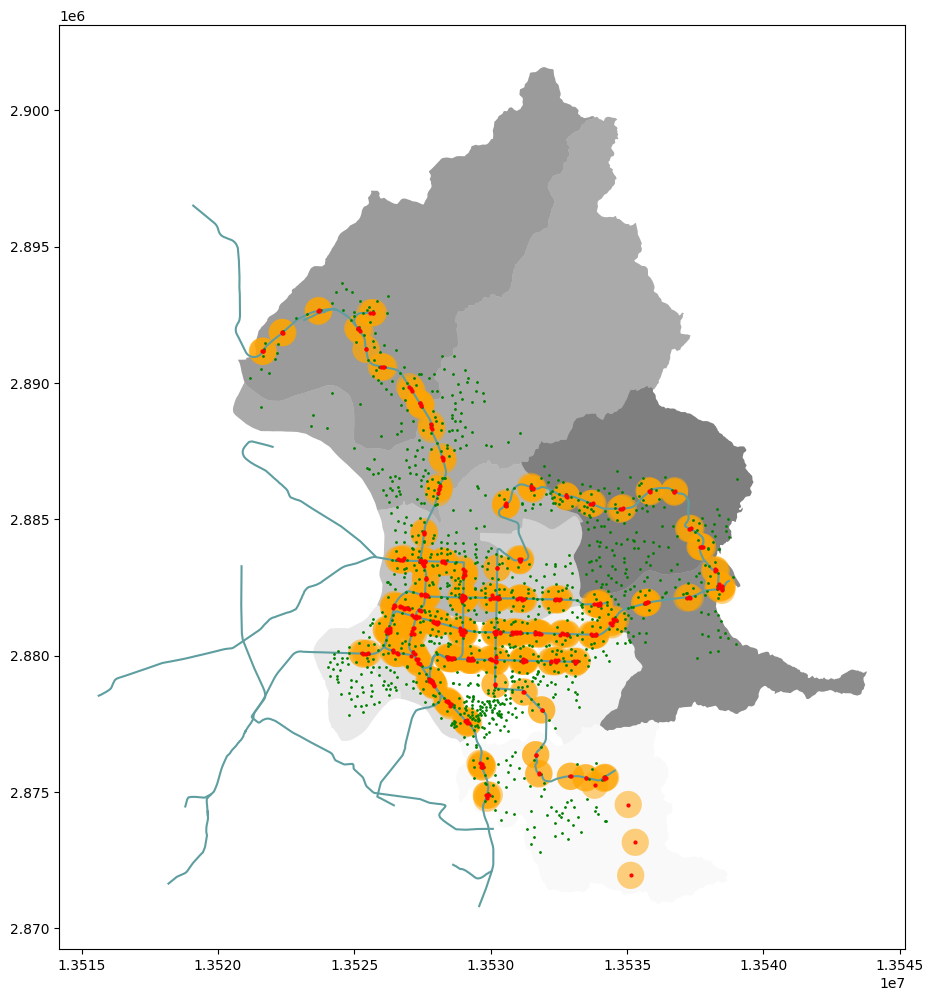

In [10]:
buffer_station = clip_station.buffer(500)

# visualization
fig, ax = plt.subplots(figsize=(12, 12))
Taipei_data.plot(cmap='Greys', ax=ax, alpha=.5)

buffer_station.plot(ax=ax,
                    alpha=.5, color = 'orange', zorder = 1)
clip_station.plot(color = 'red', ax=ax,
                 column='MARKNAME2', markersize = 4, zorder = 4)
Youbike_data_gdf.plot(color = 'green', ax=ax,
                 column='station', markersize = 1, zorder = 3)
MRTRoutes_gdf.plot(color = 'cadetblue', ax = ax, zorder = 2)

Overlay

<Axes: >

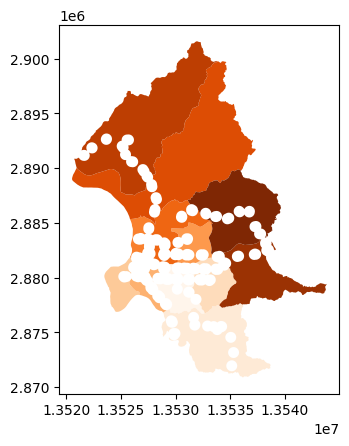

In [26]:
buffer_station_df = gpd.GeoDataFrame(geometry=gpd.GeoSeries(buffer_station))
station_overlay = Taipei_data.overlay(buffer_station_df, how = 'difference')
station_overlay.plot(cmap='Oranges')